In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

## Get the Dataset

In [10]:
#1. to give coloumn while creating data frame from array-like DS use columns=["".""]
#2.to five column name while reading csv file(creating data frame from the cs files iise names=["",""])
df=pd.read_csv("ml-100k/u.data",sep="\t",names=["user_id","item_id","rating","timestamp"])
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [11]:
#3. another way to add column name to data frame created by reading csv file
df_1=pd.read_csv("ml-100k/u.data",sep="\t")
df_1.columns=["user_id","item_id","rating","timestamp"]
df_1.head()

,user_id,item_id,rating,timestamp
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [12]:
df.shape

(100000, 4)

In [13]:
df['user_id'].nunique()

943

In [14]:
df['item_id'].nunique()

1682

In [26]:
movie_titles=pd.read_csv("ml-100k/u.item",sep="\|",encoding="latin-1",header=None)
# header =None-> provide coloumns 's indexes explicitely'

In [29]:
movie_titles=movie_titles[[0,1]]
movie_titles.head()
movie_titles.columns=["item_id","title"]
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [30]:
# merge two Data-Frames using panda library on th basis of common key
df=pd.merge(df,movie_titles,on="item_id")

In [31]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


## Exploratory Data Analysis

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [48]:
df_ex1=df.groupby('title').mean()
print(df_ex1)
print(type(df_ex1))#still a DataFrame
df_ex1.head()
#print(df.head())
df.head()

                                          user_id  item_id    rating  \
title                                                                  
'Til There Was You (1997)              383.777778   1300.0  2.333333   
1-900 (1994)                           477.000000   1353.0  2.600000   
101 Dalmatians (1996)                  450.330275    225.0  2.908257   
12 Angry Men (1957)                    453.552000    178.0  4.344000   
187 (1997)                             517.097561    330.0  3.024390   
...                                           ...      ...       ...   
Young Guns II (1990)                   504.068182   1188.0  2.772727   
Young Poisoner's Handbook, The (1995)  452.487805    547.0  3.341463   
Zeus and Roxanne (1997)                532.833333   1164.0  2.166667   
unknown                                311.888889    267.0  3.444444   
Á köldum klaka (Cold Fever) (1994)     655.000000   1633.0  3.000000   

                                          timestamp  
title    

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [51]:
df_ex1['rating']# not a data frame but it's a Series
print(type(df_ex1['rating']))
# convert into dat frame
df_ex2=pd.DataFrame(df_ex1['rating'])
df_ex2

<class 'pandas.core.series.Series'>


,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [52]:
df.groupby('title').count() # doesn't mutate the oroginal data frame

,user_id,item_id,rating,timestamp
title,,,,
'Til There Was You (1997),9,9,9,9
1-900 (1994),5,5,5,5
101 Dalmatians (1996),109,109,109,109
12 Angry Men (1957),125,125,125,125
187 (1997),41,41,41,41
...,...,...,...,...
Young Guns II (1990),44,44,44,44
"Young Poisoner's Handbook, The (1995)",41,41,41,41
Zeus and Roxanne (1997),6,6,6,6


In [53]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [59]:
df.groupby('title').count().sort_values(by=['rating'],ascending=False)['rating']# here title in placce of index
# using groupby it replace the indexes **imp


title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [61]:
# creating a new Dat frame
ratings=pd.DataFrame(df.groupby('title').mean()['rating'])
ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [62]:
## **imp->
## adding one data frame to another data frame as a column
## adding a new column to a data frame-> but to add this to another data frame both df should have same index format
## means only numbers(S.R.no.) or title
ratings['num_of_ratings']=pd.DataFrame(df.groupby('title').count()['rating'])
ratings

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [64]:
ratings.sort_values(by='rating',ascending=False)# still a data frame

,rating,num_of_ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


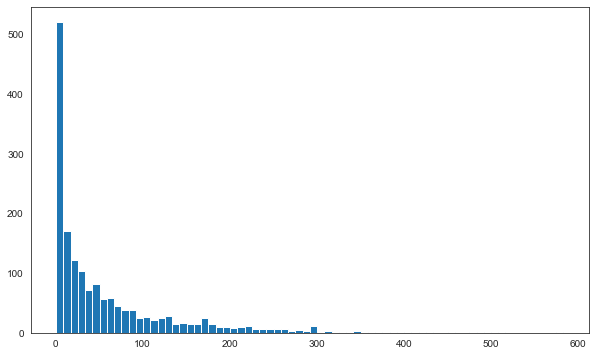

In [65]:
plt.figure(figsize=(10,6))
plt.hist(ratings['num_of_ratings'],bins=70)
plt.show()

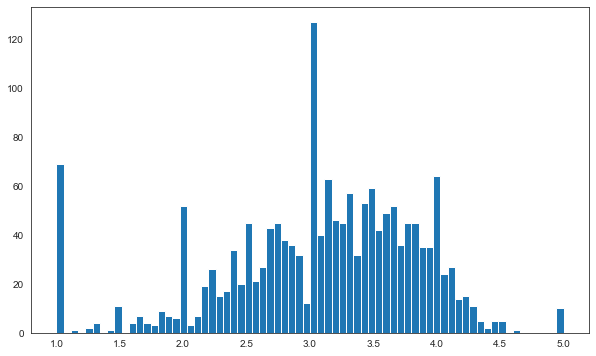

In [67]:
plt.figure(figsize=(10,6))
plt.hist(list(ratings['rating']),bins=70)# whether o use list or not it''l not affect the Hist output
plt.show()

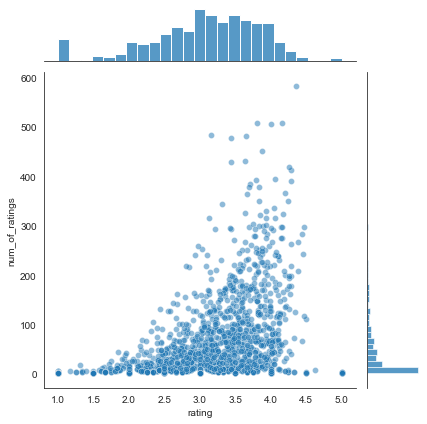

In [70]:
# joint plot using seaborn library
sns.jointplot(x='rating',y='num_of_ratings',data=ratings,alpha=0.5)

## Creating Movie Recommendation

In [71]:
# create a mavie matrix
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [73]:
moviemat=df.pivot_table(index="user_id",columns="title",values="rating")
moviemat# it's actually a DataFrame


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
print(type(moviemat))

<class 'pandas.core.frame.DataFrame'>


if we want to get all rows/details corresponding any coloumn then ->matrix['column_name'] and to make any property a column
we can use pivot_table bcoz in this way indexes will also be priinted as a neccessary information
Or in any other way we can create from scratch by giving cilumns_list but it'll we a combursome way

In [75]:
ratings.sort_values(by="num_of_ratings",ascending=False)


,rating,num_of_ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [79]:
star_wars_user_rating=moviemat['Star Wars (1977)']
star_wars_user_rating.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [82]:
## co-relating star-wars with other movies
similar_to_star_wars=moviemat.corrwith(star_wars_user_rating)
similar_to_star_wars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [87]:
corr_starwars=pd.DataFrame(similar_to_star_wars,columns=['Correlations'])# use columns=[] while creating DataFrame using array_llike DS

In [88]:
corr_starwars.dropna(inplace=True)# inplace mutate corr_starwars

In [89]:
corr_starwars.head()

,Correlations
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [90]:
corr_starwars.sort_values(by=["Correlations"],ascending=False)

,Correlations
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [91]:
# BUT we want those movie which are watched by more than 100 people and also highly Correlatable

In [93]:
# Note : we can directly join/merge two dataframe if they have same indexes
corr_starwars=corr_starwars.join(ratings)
corr_starwars.head()

,Correlations,rating,num_of_ratings
title,,,
'Til There Was You (1997),0.872872,2.333333,9
1-900 (1994),-0.645497,2.600000,5
101 Dalmatians (1996),0.211132,2.908257,109
12 Angry Men (1957),0.184289,4.344000,125
187 (1997),0.027398,3.024390,41


In [97]:
corr_starwars[corr_starwars['num_of_ratings']>100].sort_values('Correlations',ascending=False)

,Correlations,rating,num_of_ratings
title,,,
Star Wars (1977),1.000000,4.358491,583
"Empire Strikes Back, The (1980)",0.747981,4.204360,367
Return of the Jedi (1983),0.672556,4.007890,507
Raiders of the Lost Ark (1981),0.536117,4.252381,420
Austin Powers: International Man of Mystery (1997),0.377433,3.246154,130
...,...,...,...
"Edge, The (1997)",-0.127167,3.539823,113
As Good As It Gets (1997),-0.130466,4.196429,112
Crash (1996),-0.148507,2.546875,128


## Predict Function

In [107]:
def predict_movies(movie_name):
    movie_user_rating=moviemat[movie_name]
    similar_to_movie=moviemat.corrwith(movie_user_rating)
    corr_movie=pd.DataFrame(similar_to_movie,columns=['Correlations'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings)
    predictions=corr_movie[corr_movie["num_of_ratings"]>100].sort_values("Correlations",ascending=False)
    return predictions
    
    

In [108]:
prediction=predict_movies('Empire Strikes Back, The (1980)')
prediction.head()

,Correlations,rating,num_of_ratings
title,,,
"Empire Strikes Back, The (1980)",1.000000,4.204360,367
Star Wars (1977),0.747981,4.358491,583
Return of the Jedi (1983),0.721229,4.007890,507
Raiders of the Lost Ark (1981),0.538659,4.252381,420
"Philadelphia Story, The (1940)",0.482151,4.115385,104
